<a href="https://colab.research.google.com/github/ananyaa06/5_min_walk/blob/main/AI4ALL_code_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('college_data.csv')
names = dataset[dataset.columns[0]]
dataset.drop(columns=dataset.columns[0], axis=1, inplace=True)
dataset.head()

,year,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,2013,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,Implied no,Implied no,Implied no,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,2013,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,Yes,Implied no,Yes,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,2013,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,Implied no,Yes,Implied no,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,2013,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,Implied no,Implied no,Implied no,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,2013,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,Implied no,Implied no,Implied no,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

5 columns were label encoded.


In [5]:
dataset.head()

,year,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,2013,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,Implied no,Implied no,Implied no,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,2013,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,Yes,Implied no,Yes,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,2013,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,Implied no,Yes,Implied no,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,2013,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,Implied no,Implied no,Implied no,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,2013,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,Implied no,Implied no,Implied no,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) >= 2:
          dataset = pd.concat([dataset,pd.get_dummies(dataset[col], prefix=col)],axis=1)
          dataset.drop([col],axis=1, inplace=True)
          ct_count += 1
print('{} columns were label encoded.'.format(ct_count))


20 columns were label encoded.


In [7]:
dataset.head()

,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,...,Degree of urbanization (Urban-centric locale)_Town: Remote,Carnegie Classification 2010: Basic_Baccalaureate Colleges--Arts & Sciences,Carnegie Classification 2010: Basic_Baccalaureate Colleges--Diverse Fields,Carnegie Classification 2010: Basic_Baccalaureate/Associate's Colleges,Carnegie Classification 2010: Basic_Doctoral/Research Universities,Carnegie Classification 2010: Basic_Master's Colleges and Universities (larger programs),Carnegie Classification 2010: Basic_Master's Colleges and Universities (medium programs),Carnegie Classification 2010: Basic_Master's Colleges and Universities (smaller programs),Carnegie Classification 2010: Basic_Research Universities (high research activity),Carnegie Classification 2010: Basic_Research Universities (very high research activity)
0,2013,-86.568502,34.783368,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,...,0,0,0,0,0,1,0,0,0,0
1,2013,-86.809170,33.502230,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,-86.174010,32.362609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,2013,-86.638420,34.722818,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,...,0,0,0,0,0,0,0,0,0,1
4,2013,-86.295677,32.364317,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
from sklearn import preprocessing

sc_count = 0
for col in dataset.columns[1:]:
  min_max_scaler = preprocessing.MinMaxScaler()
  scaled = min_max_scaler.fit_transform(np.array(dataset[col]).reshape(-1,1))
  dataset[col] = scaled
  sc_count += 1
print('{} columns were label encoded.'.format(sc_count))

964 columns were label encoded.


In [9]:
dataset.head()

,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,...,Degree of urbanization (Urban-centric locale)_Town: Remote,Carnegie Classification 2010: Basic_Baccalaureate Colleges--Arts & Sciences,Carnegie Classification 2010: Basic_Baccalaureate Colleges--Diverse Fields,Carnegie Classification 2010: Basic_Baccalaureate/Associate's Colleges,Carnegie Classification 2010: Basic_Doctoral/Research Universities,Carnegie Classification 2010: Basic_Master's Colleges and Universities (larger programs),Carnegie Classification 2010: Basic_Master's Colleges and Universities (medium programs),Carnegie Classification 2010: Basic_Master's Colleges and Universities (smaller programs),Carnegie Classification 2010: Basic_Research Universities (high research activity),Carnegie Classification 2010: Basic_Research Universities (very high research activity)
0,2013,0.789065,0.333993,0.084512,0.154153,0.107802,0.15,0.88,0.146341,0.204545,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2013,0.786409,0.305621,0.078279,0.137764,0.173128,0.06,0.93,0.512195,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2013,0.793419,0.280383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013,0.788293,0.332652,0.028262,0.046238,0.063568,0.34,0.94,0.487805,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2013,0.792076,0.280421,0.140968,0.146615,0.144419,0.18,0.87,0.170732,0.272727,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.01)
dataset = pd.DataFrame(sel.fit_transform(dataset))

quasi_constant = [col for col in dataset.columns if col not in sel.get_feature_names_out()]
len(quasi_constant)

dataset = dataset.dropna(axis=0)

In [11]:

dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
5,0.778279,0.299247,0.426207,0.489041,0.630212,0.23,0.76,0.439024,0.590909,0.448980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.800942,0.285645,0.216646,0.363730,0.363832,0.17,0.83,0.512195,0.590909,0.530612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,0.785791,0.296852,0.019057,0.033757,0.051850,0.03,0.96,0.451220,0.575000,0.377551,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22,0.771258,0.243454,0.066239,0.115650,0.183381,0.08,0.92,0.317073,0.431818,0.316327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34,0.519962,0.277492,0.362279,0.565433,0.722683,0.66,0.52,0.421951,0.545455,0.448980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


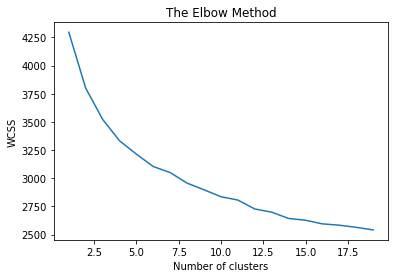

In [12]:

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 11, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset)
dataset = dataset.assign(KMeans = y_kmeans)

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 11, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(dataset)
dataset = dataset.assign(Heirarchical_Clustering = y_hc)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [15]:
from sklearn.cluster import MeanShift
ms = MeanShift()
y_ms = ms.fit_predict(dataset)
cluster_centers = ms.cluster_centers_
dataset = dataset.assign(Mean_Shift = y_ms)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [16]:
dataset.insert(0, "Names", names, True)

In [17]:
import random
no_of_colors=11
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(no_of_colors)]
print(color)

['#04417E', '#26317A', '#470441', '#34D3D0', '#49CE25', '#B23DFA', '#6B6226', '#17DA4C', '#DE5D08', '#5075F9', '#CC1B93']
